In [1]:
import numpy as np
import pandas as pd

In [2]:
df19 = pd.read_csv("Merged_Data2019.circ")
df19.shape

(27931, 28)

In [3]:
df20 = pd.read_csv("Merged_Data2020.circ")
df20.shape

(22885, 28)

In [4]:
df21 = pd.read_csv("Merged_Data2021.circ")
df21.shape

(23505, 28)

In [5]:
df22 = pd.read_csv("Merged_Data2022.circ")
df22.shape

(9101, 28)

In [6]:
df23 = pd.read_csv("Merged_Data2023.circ")
df23.shape

(14975, 28)

In [7]:
df19.columns

Index(['MDR_REPORT_KEY', 'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'LOT_NUMBER',
       'DEVICE_AVAILABILITY', 'DATE_RETURNED_TO_MANUFACTURER',
       'DEVICE_REPORT_PRODUCT_CODE', 'DEVICE_AGE_TEXT',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'PATIENT_SEQUENCE_NUMBER',
       'FOI_TEXT'],
      dtype='object')

In [8]:
stacked_df = pd.concat([df19,df20,df21,df22,df23],axis=0)

In [9]:
stacked_df.shape

(98397, 28)

In [10]:
stacked_df.head()

,MDR_REPORT_KEY,DEVICE_SEQUENCE_NO,DATE_RECEIVED,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,MANUFACTURER_D_ADDRESS_2,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_ZIP_CODE,...,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,FOI_TEXT
0,8207329,1,2019/01/01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,2018/12/26,NIK,DA,Y,N,NaN,131761059,D,1,FOLLOWING THE BATTERY PERFORMANCE ALERT (BPA) ...
1,8207329,1,2019/01/01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,2018/12/26,NIK,DA,Y,N,NaN,176329649,N,1,PREMATURE BATTERY DEPLETION WAS CONFIRMED BY A...
2,8207389,1,2019/01/01,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,NaN,LWP,NaN,R,N,NaN,131764902,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
3,8207389,1,2019/01/01,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,NaN,LWP,NaN,R,N,NaN,131764903,D,1,"IT WAS REPORTED THAT DURING FOLLOW-UP VISIT, D..."
4,8207400,1,2019/01/01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,NaN,NIK,NaN,R,N,5.414735e+12,131761474,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...


In [11]:
stacked_df['FOI_TEXT'][:10].values

array(['FOLLOWING THE BATTERY PERFORMANCE ALERT (BPA) ADVISORY, A BPA WAS RECEIVED BY THE CLINICIAN AND THE DEVICE WAS EXPLANTED. THE PATIENT WAS IN STABLE CONDITION.',
       'PREMATURE BATTERY DEPLETION WAS CONFIRMED BY ANALYSIS. BENCH TESTING ON THE DEVICE WAS PERFORMED, AND NO SOURCES OF HIGH CURRENT WERE NOTED. THE CAUSE OF THE PREMATURE BATTERY DEPLETION WAS CONSISTENT WITH LI CLUSTER FORMATION. FROM THESE ANALYSES, IN THE ABSENCE OF HIGH CURRENT DRAW, IT IS PROBABLE THAT THE PREMATURE BATTERY DEPLETION WAS CAUSED BY A LITHIUM CLUSTER INDUCED SHORT CIRCUIT. LI CLUSTERS ARE A KNOWN DEPLETION MECHANISM FOR THESE ADVISORY PRODUCTS THAT HAS BEEN INVESTIGATED AND ASSOCIATED WITH A FIELD ACTION IN OCTOBER 2016.',
       'THE RESULTS OF THE INVESTIGATION ARE INCONCLUSIVE SINCE THE DEVICE WAS NOT RETURNED FOR ANALYSIS. BASED ON THE INFORMATION RECEIVED, THE CAUSE OF THE REPORTED INCIDENT COULD NOT BE CONCLUSIVELY DETERMINED.',
       'IT WAS REPORTED THAT DURING FOLLOW-UP VISIT, DEVICE W

In [12]:
#data = stacked_df[stacked_df['TEXT_TYPE_CODE']=='N']

In [13]:
data = stacked_df.copy()

### Data Cleaning

#### Dropping all the possible null values in rows

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98397 entries, 0 to 14974
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MDR_REPORT_KEY                  98397 non-null  int64  
 1   DEVICE_SEQUENCE_NO              98397 non-null  int64  
 2   DATE_RECEIVED                   98397 non-null  object 
 3   GENERIC_NAME                    98397 non-null  object 
 4   MANUFACTURER_D_NAME             98355 non-null  object 
 5   MANUFACTURER_D_ADDRESS_1        98341 non-null  object 
 6   MANUFACTURER_D_ADDRESS_2        501 non-null    object 
 7   MANUFACTURER_D_CITY             98340 non-null  object 
 8   MANUFACTURER_D_STATE_CODE       98302 non-null  object 
 9   MANUFACTURER_D_ZIP_CODE         98335 non-null  object 
 10  MANUFACTURER_D_ZIP_CODE_EXT     2 non-null      object 
 11  MANUFACTURER_D_COUNTRY_CODE     98339 non-null  object 
 12  MANUFACTURER_D_POSTAL_CODE      98335

In [15]:
data.columns

Index(['MDR_REPORT_KEY', 'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'LOT_NUMBER',
       'DEVICE_AVAILABILITY', 'DATE_RETURNED_TO_MANUFACTURER',
       'DEVICE_REPORT_PRODUCT_CODE', 'DEVICE_AGE_TEXT',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'PATIENT_SEQUENCE_NUMBER',
       'FOI_TEXT'],
      dtype='object')

In [16]:
data[data['MDR_REPORT_KEY'].duplicated()]

,MDR_REPORT_KEY,DEVICE_SEQUENCE_NO,DATE_RECEIVED,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,MANUFACTURER_D_ADDRESS_2,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_ZIP_CODE,...,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,FOI_TEXT
1,8207329,1,2019/01/01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,2018/12/26,NIK,DA,Y,N,NaN,176329649,N,1,PREMATURE BATTERY DEPLETION WAS CONFIRMED BY A...
3,8207389,1,2019/01/01,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,NaN,LWP,NaN,R,N,NaN,131764903,D,1,"IT WAS REPORTED THAT DURING FOLLOW-UP VISIT, D..."
5,8207400,1,2019/01/01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,NaN,NIK,NaN,R,N,5.414735e+12,131761475,D,1,IT WAS REPORTED THAT WHEN THE PATIENT PRESENTE...
7,8207410,1,2019/01/01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,NaN,NIK,DA,R,N,5.414735e+12,131764901,D,1,IT WAS REPORTED THAT DEVICE WAS FOUND TO BE IN...
8,8207410,1,2019/01/01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",645 ALMANOR AVENUE,NaN,SUNNYVALE,CA,94085.0,...,NaN,NIK,DA,R,N,5.414735e+12,176331293,D,1,NEW INFORMATION RECEIVED NOTES THAT THE PATIEN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,18416385,1,2023/12/28,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,4100 HAMLINE AVENUE NORTH,NaN,SAINT PAUL,MN,55112.0,...,NaN,LWS,DA,R,N,8.025265e+11,331578848,D,0,IT WAS REPORTED THAT THIS IMPLANTABLE CARDIOVE...
14967,18416385,1,2023/12/28,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,4100 HAMLINE AVENUE NORTH,NaN,SAINT PAUL,MN,55112.0,...,NaN,LWS,DA,R,N,8.025265e+11,339700902,N,0,THIS PRODUCT HAS NOT BEEN RETURNED TO BOSTON S...
14968,18416385,1,2023/12/28,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,4100 HAMLINE AVENUE NORTH,NaN,SAINT PAUL,MN,55112.0,...,NaN,LWS,DA,R,N,8.025265e+11,339700903,D,0,IT WAS REPORTED THAT THIS IMPLANTABLE CARDIOVE...
14970,18416758,1,2023/12/29,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,4100 HAMLINE AVENUE NORTH,NaN,SAINT PAUL,MN,55112.0,...,2023/12/22,LWS,DA,Y,N,8.025266e+11,339684183,N,0,UPON RECEIPT AT OUR POST MARKET QUALITY ASSURA...


In [17]:
## Sum of all the duplicate values present
data['MDR_REPORT_KEY'].duplicated().sum()

51825

In [18]:
## Dropping duplicate values for MDR_Report_key
data.drop_duplicates('MDR_REPORT_KEY',inplace=True)

In [19]:
data.shape

(46572, 28)

In [20]:
data['DEVICE_SEQUENCE_NO'].value_counts()
## Minorities could either could be droped or replaced with the mode
#i = data[data['DEVICE_SEQUENCE_NO']!=1].index

DEVICE_SEQUENCE_NO
1    46547
0       23
2        2
Name: count, dtype: int64

In [21]:
data['DATE_RECEIVED'].head() 
data['DATE_RECEIVED']=pd.to_datetime(data['DATE_RECEIVED'],format='%Y/%m/%d')

In [22]:
data['MANUFACTURER_D_NAME'].isna().sum()

14

### Columns that shoudn't matter
1. MANUFACTURER_D_ADDRESS_1
2. MANUFACTURER_D_ADDRESS_2
3. MANUFACTURER_D_ZIP_CODE
4. MANUFACTURER_D_ZIP_CODE_EXT
5. DATE_RETURNED_TO_MANUFACTURER   


In [23]:
data.drop(['MANUFACTURER_D_ADDRESS_1','MANUFACTURER_D_ADDRESS_2','MANUFACTURER_D_ZIP_CODE','MANUFACTURER_D_ZIP_CODE_EXT'],axis=1,inplace=True)

In [24]:
data.dropna(subset=['MANUFACTURER_D_NAME','MANUFACTURER_D_CITY','MANUFACTURER_D_STATE_CODE',
                  'MANUFACTURER_D_COUNTRY_CODE','MANUFACTURER_D_POSTAL_CODE','DEVICE_OPERATOR',
                   'EXPIRATION_DATE_OF_DEVICE','MODEL_NUMBER','LOT_NUMBER','DEVICE_EVALUATED_BY_MANUFACTUR',
                    'UDI-DI','FOI_TEXT'],inplace=True)

In [25]:
data.drop(['DATE_RETURNED_TO_MANUFACTURER','DEVICE_AGE_TEXT'],axis=1,inplace=True)

In [26]:
data.drop("DEVICE_SEQUENCE_NO",axis=1,inplace=True)

In [27]:
data.drop("MANUFACTURER_D_COUNTRY_CODE",axis=1,inplace=True)

### Data-Type Correction

In [28]:
data['MANUFACTURER_D_POSTAL_CODE'] = data['MANUFACTURER_D_POSTAL_CODE'].astype('int')

In [29]:
data['EXPIRATION_DATE_OF_DEVICE']=pd.to_datetime(data['EXPIRATION_DATE_OF_DEVICE'],format='%Y/%m/%d')

### Data-Values Correction

In [30]:
data['MANUFACTURER_D_NAME']=data['MANUFACTURER_D_NAME'].replace(['ST. JUDE MEDICAL, INC.(CRM-SYLMAR)','ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)',
             'ST. JUDE MEDICAL INC. (AFD CAT-SUNNYVALE)','ST. JUDE MEDICAL - NEUROMODULATION (PUERTO RICO, LLC)'
             'ST. JUDE MEDICAL - NEUROMODULATION (PUERTO RICO)','ST. JUDE MEDICAL INC. (AFD CAT-SUNNYVALE)'
             ],'ST. JUDE MEDICAL, INC.')

In [31]:
data['MANUFACTURER_D_NAME']=data['MANUFACTURER_D_NAME'].replace(['ST. JUDE MEDICAL - NEUROMODULATION (PUERTO RICO, LLC)',
                                     'ST. JUDE MEDICAL - NEUROMODULATION (PUERTO RICO)'
                                    ],'ST. JUDE MEDICAL, INC.')

In [32]:
data['MANUFACTURER_D_NAME']=data['MANUFACTURER_D_NAME'].replace(['ABBOTT CRM','ABBOTT, INC.(CRM-SYLMAR)','ABBOTT, CRMD',
                                    'ABBOTT(CRM-SYLMAR)','ABBOTT(CRM-SUNNYVALE)'],'ABBOTT')

In [33]:
data['MANUFACTURER_D_NAME'].value_counts()

MANUFACTURER_D_NAME
ST. JUDE MEDICAL, INC.           26862
ABBOTT                            2579
BOSTON SCIENTIFIC CORPORATION     1336
CAMERON HEALTH                       3
OSCOR INC                            3
Name: count, dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30783 entries, 4 to 14973
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   MDR_REPORT_KEY                  30783 non-null  int64         
 1   DATE_RECEIVED                   30783 non-null  datetime64[ns]
 2   GENERIC_NAME                    30783 non-null  object        
 3   MANUFACTURER_D_NAME             30783 non-null  object        
 4   MANUFACTURER_D_CITY             30783 non-null  object        
 5   MANUFACTURER_D_STATE_CODE       30783 non-null  object        
 6   MANUFACTURER_D_POSTAL_CODE      30783 non-null  int32         
 7   DEVICE_OPERATOR                 30783 non-null  object        
 8   EXPIRATION_DATE_OF_DEVICE       30783 non-null  datetime64[ns]
 9   MODEL_NUMBER                    30783 non-null  object        
 10  LOT_NUMBER                      30783 non-null  object        
 11  DEVICE_

In [35]:
i1 = data[data['DEVICE_AVAILABILITY']=='*'].index

In [36]:
i2 = data[data['DEVICE_EVALUATED_BY_MANUFACTUR']=='*'].index

In [37]:
data.drop(i1,inplace=True)

In [38]:
data.drop(i2,inplace=True)

### Mapping of Categorical Values 

In [39]:
data['DEVICE_OPERATOR']=data['DEVICE_OPERATOR'].map({'0HP':'HEALTH PROFESSIONAL',
                             '0LP':'LAY USER',
                             '000':"OTHERS",
                             '0': "OTHERS",
                             "I": "PHYSICIAN"})

In [40]:
data['DEVICE_EVALUATED_BY_MANUFACTUR']=data['DEVICE_EVALUATED_BY_MANUFACTUR'].map({
    'R':"NOT RETURNED",
    'Y':"YES",
    'N':"NO"
})

In [41]:
data['COMBINATION_PRODUCT_FLAG']=data['COMBINATION_PRODUCT_FLAG'].map({
    'N':"NO",
    'Y':"YES"
})

In [42]:
data['TEXT_TYPE_CODE'].value_counts()

TEXT_TYPE_CODE
N    18561
D    12073
Name: count, dtype: int64

In [43]:
data.shape

(30634, 20)

In [44]:
data.head()

,MDR_REPORT_KEY,DATE_RECEIVED,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_POSTAL_CODE,DEVICE_OPERATOR,EXPIRATION_DATE_OF_DEVICE,MODEL_NUMBER,LOT_NUMBER,DEVICE_AVAILABILITY,DEVICE_REPORT_PRODUCT_CODE,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,FOI_TEXT
4,8207400,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SUNNYVALE,CA,94085,HEALTH PROFESSIONAL,2013-09-30,CD3249-40Q,3673036,N,NIK,NOT RETURNED,NO,5.414735e+12,131761474,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
6,8207410,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SUNNYVALE,CA,94085,HEALTH PROFESSIONAL,2018-01-31,CD3357-40C,A000017695,N,NIK,NOT RETURNED,NO,5.414735e+12,131764900,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
9,8207416,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2016-06-30,CD3365-40Q,4679489,R,NIK,YES,NO,5.414735e+12,131761530,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
12,8207419,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2020-08-31,CD3357-40Q,A000063963,N,NIK,NOT RETURNED,NO,5.414735e+12,131761376,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
14,8207424,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2015-03-31,CD3265-40Q,4261902,R,NIK,YES,NO,5.414735e+12,131761374,N,1,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...


In [45]:
data1 = data.drop_duplicates('FOI_TEXT')

In [46]:
data1.columns

Index(['MDR_REPORT_KEY', 'DATE_RECEIVED', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_POSTAL_CODE',
       'DEVICE_OPERATOR', 'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER',
       'LOT_NUMBER', 'DEVICE_AVAILABILITY', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'PATIENT_SEQUENCE_NUMBER',
       'FOI_TEXT'],
      dtype='object')

In [47]:
data['DATE_RECEIVED'].head(10)

4    2019-01-01
6    2019-01-01
9    2019-01-01
12   2019-01-01
14   2019-01-01
19   2019-01-02
22   2019-01-02
24   2019-01-02
27   2019-01-02
33   2019-01-02
Name: DATE_RECEIVED, dtype: datetime64[ns]

In [48]:
data1[data1['DATE_RECEIVED'].dt.year == 2020].shape

(141, 20)

### Data Visualization

In [49]:
years_list = [2019,2020,2021,2022,2023]
data_count = []
for i in years_list:
    data_count.append(data1[data1['DATE_RECEIVED'].dt.year == i].shape[0])


In [50]:
import matplotlib.pyplot as plt

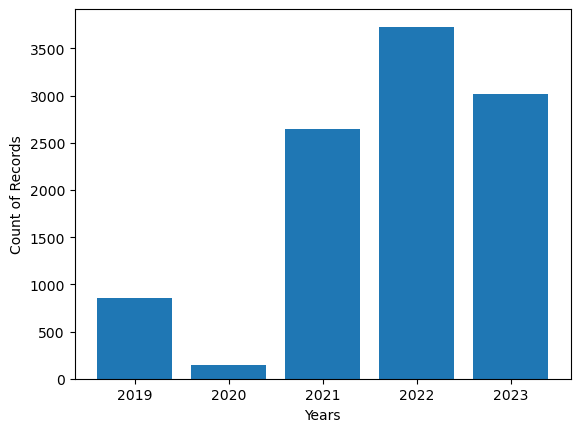

In [51]:
plt.bar(years_list,data_count)
plt.xlabel('Years')
plt.ylabel('Count of Records')
plt.show()

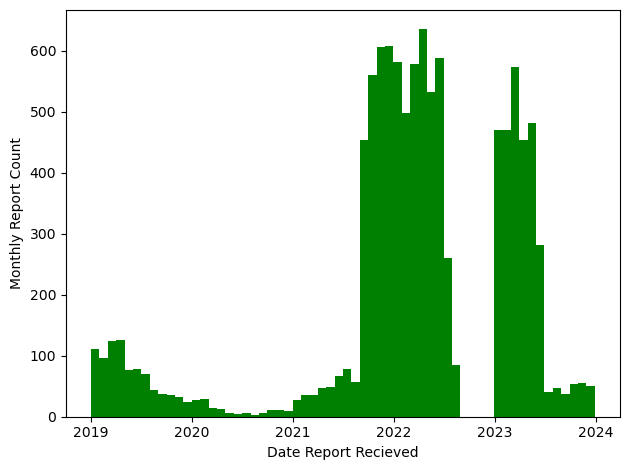

In [52]:
plt.hist(data1['DATE_RECEIVED'], bins = 60,color='green')
plt.xlabel('Date Report Recieved')
plt.ylabel('Monthly Report Count')
plt.tight_layout()

In [53]:
!pip install wordcloud
from wordcloud import WordCloud

In [54]:
patient_text = data1['FOI_TEXT']
main_text = ' '.join(str(i) for i in patient_text)

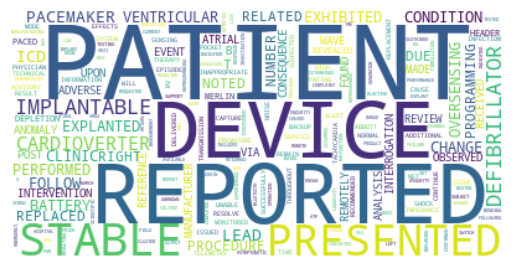

In [55]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(main_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
data1.columns

Index(['MDR_REPORT_KEY', 'DATE_RECEIVED', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_POSTAL_CODE',
       'DEVICE_OPERATOR', 'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER',
       'LOT_NUMBER', 'DEVICE_AVAILABILITY', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'PATIENT_SEQUENCE_NUMBER',
       'FOI_TEXT'],
      dtype='object')

In [57]:
data['GENERIC_NAME'].value_counts()

GENERIC_NAME
IMPLANTABLE CARDIOVERTER DEFIBRILLATOR    19296
IMPLANTABLE PACEMAKER PULSE GENERATOR     11338
Name: count, dtype: int64

In [58]:
data1.shape

(10389, 20)

In [59]:
data1.to_excel("Cleaned_data.xlsx")

In [60]:
data1.head()

,MDR_REPORT_KEY,DATE_RECEIVED,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_POSTAL_CODE,DEVICE_OPERATOR,EXPIRATION_DATE_OF_DEVICE,MODEL_NUMBER,LOT_NUMBER,DEVICE_AVAILABILITY,DEVICE_REPORT_PRODUCT_CODE,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,FOI_TEXT
4,8207400,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SUNNYVALE,CA,94085,HEALTH PROFESSIONAL,2013-09-30,CD3249-40Q,3673036,N,NIK,NOT RETURNED,NO,5.414735e+12,131761474,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
9,8207416,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2016-06-30,CD3365-40Q,4679489,R,NIK,YES,NO,5.414735e+12,131761530,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
14,8207424,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2015-03-31,CD3265-40Q,4261902,R,NIK,YES,NO,5.414735e+12,131761374,N,1,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...
19,8208549,2019-01-02,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-10-31,CD2231-40Q,3374873,R,NVZ,YES,NO,5.414735e+12,131793503,N,1,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...
33,8209283,2019-01-02,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-02-29,5826,3190172,R,LWP,YES,NO,5.414735e+12,131814304,D,1,THE PATIENT PRESENTED IN THE EMERGENCY ROOM DU...


In [61]:
data1[['MDR_REPORT_KEY','FOI_TEXT']]

,MDR_REPORT_KEY,FOI_TEXT
4,8207400,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
9,8207416,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...
14,8207424,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...
19,8208549,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...
33,8209283,THE PATIENT PRESENTED IN THE EMERGENCY ROOM DU...
...,...,...
14955,18396308,IT WAS REPORTED THAT THIS SYSTEM WITH A RIGHT ...
14958,18405271,IT WAS REPORTED THAT THIS IMPLANTABLE CARDIOVE...
14964,18411064,IT WAS REPORTED THAT THIS SUBCUTANEOUS IMPLANT...
14969,18416758,IT WAS REPORTED THAT THIS SUBCUTANEOUS IMPLANT...


In [62]:
data1['FOI_TEXT'].values

array(['THE RESULTS OF THE INVESTIGATION ARE INCONCLUSIVE SINCE THE DEVICE WAS NOT RETURNED FOR ANALYSIS. BASED ON THE INFORMATION RECEIVED, THE CAUSE OF THE REPORTED INCIDENT COULD NOT BE CONCLUSIVELY DETERMINED.',
       'THE RESULTS OF THE INVESTIGATION ARE INCONCLUSIVE SINCE THE DEVICE WAS NOT RETURNED FOR ANALYSIS. BASED ON THE INFORMATION RECEIVED, THE CAUSE OF THE REPORTED INCIDENT COULD NOT BE CONCLUSIVELY DETERMINED. THE DEVICE IS INCLUDED IN THE BATTERY PERFORMANCE ALERT ADVISORY ISSUED BY ABBOTT ON (B)(6) 2017.',
       'THE DEVICE IS INCLUDED IN THE PREMATURE BATTERY DEPLETION WITH IMPLANTABLE CARDIOVERTER DEFIBRILLATOR ADVISORY NOTICE ISSUED BY ST. JUDE MEDICAL ON (B)(6) 2016. THE RESULTS OF THE INVESTIGATION ARE INCONCLUSIVE SINCE THE DEVICE WAS NOT RETURNED FOR ANALYSIS. BASED ON THE INFORMATION RECEIVED, THE CAUSE OF THE REPORTED INCIDENT COULD NOT BE CONCLUSIVELY DETERMINED.',
       ...,
       'IT WAS REPORTED THAT THIS SUBCUTANEOUS IMPLANTABLE CARDIOVERTER-DEFIBRILL

In [63]:
import nltk

In [64]:
from nltk import word_tokenize

In [65]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [67]:
from collections import Counter

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
stop_words = set(stopwords.words('english'))
data1['tokens'] = data1['FOI_TEXT'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10728\3192879236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tokens'] = data1['FOI_TEXT'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])


In [70]:
keywords = Counter()

In [71]:
for i in data1['tokens']:
    keywords.update(i)

In [72]:
top_keywords =dict(keywords.most_common(10))

In [73]:
top_keywords

{'patient': 17616,
 'reported': 10740,
 'device': 9181,
 'stable': 5381,
 'presented': 4971,
 'implantable': 4759,
 'defibrillator': 4451,
 'cardioverter': 4379,
 'pacemaker': 3268,
 'icd': 3114}

In [74]:
'sepsis' in keywords

True

In [75]:
'syncope' in keywords

True

In [76]:
keywords['oversensing']

2408

In [77]:
keywords.keys()

dict_keys(['results', 'investigation', 'inconclusive', 'since', 'device', 'returned', 'analysis', 'based', 'information', 'received', 'cause', 'reported', 'incident', 'could', 'conclusively', 'determined', 'included', 'battery', 'performance', 'alert', 'advisory', 'issued', 'abbott', 'b', 'premature', 'depletion', 'implantable', 'cardioverter', 'defibrillator', 'notice', 'jude', 'medical', 'october', 'patient', 'presented', 'emergency', 'room', 'due', 'ventricular', 'fibrillation', 'physician', 'attempted', 'interrogated', 'successful', 'explanted', 'replaced', 'currently', 'admitted', 'recovering', 'exhibited', 'loss', 'telemetry', 'communication', 'interrogation', 'operating', 'noted', 'pacer', 'dependent', 'left', 'procedure', 'stable', 'condition', 'adverse', 'events', 'august', 'following', 'bpa', 'clinician', 'triggered', 'feeling', 'discomfort', 'migration', 'upon', 'review', 'observed', 'migrated', 'towards', 'right', 'lower', 'armpit', 'unrelated', 'throughout', 'also', 'compl

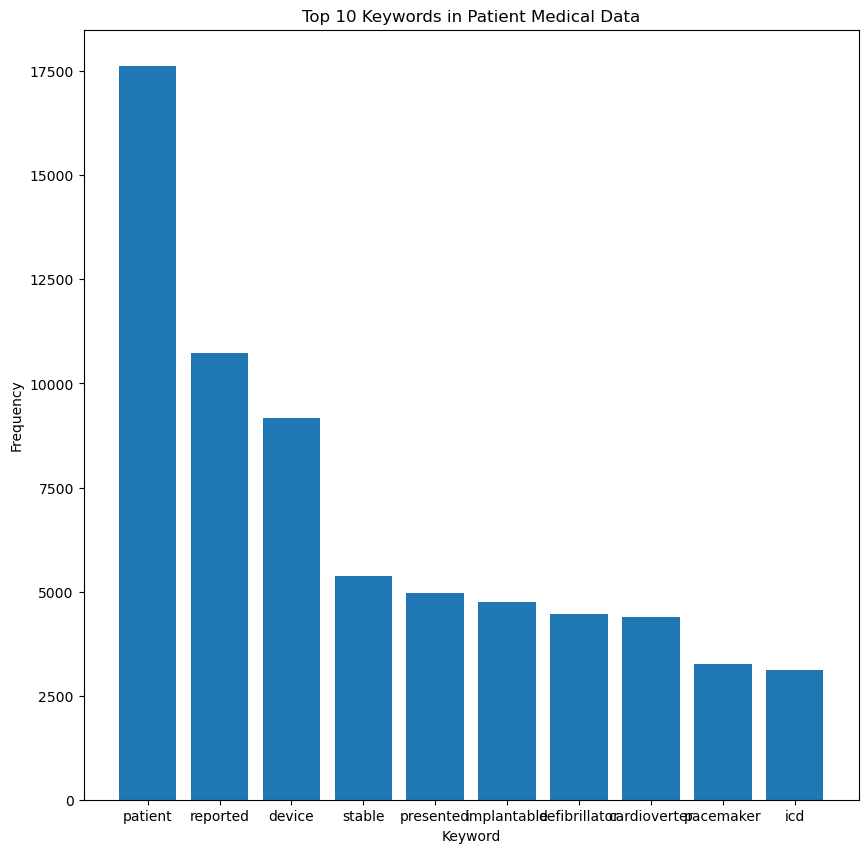

In [78]:
plt.figure(figsize=(10,10))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Top 10 Keywords in Patient Medical Data')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

In [79]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

In [80]:
data1['updated_text'] = data1['FOI_TEXT'].str.lower()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10728\2729438857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['updated_text'] = data1['FOI_TEXT'].str.lower()


In [81]:
lemmatizer = WordNetLemmatizer()

In [82]:
def preprocess_text(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    processed_text = []
    
    for sentence in sentences:
        # Tokenize words
        words = word_tokenize(sentence)
        # Remove special characters, symbols, URLs, punctuations, numbers
        words = [re.sub(r'[^\w\s]', '', word) for word in words if word.isalpha()]
        # Lemmatize words
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        # Filter short and long words
        words = [word for word in words if 1 < len(word) < 20]
        processed_text.extend(words)
    
    return processed_text

In [83]:
data1['updated_text'] = data1['updated_text'].apply(preprocess_text)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10728\2710363192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['updated_text'] = data1['updated_text'].apply(preprocess_text)


In [84]:
nlp = spacy.load('en_core_web_sm')

# Function to perform NER
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER
data1['ner_results'] = data1['FOI_TEXT'].apply(perform_ner)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10728\3708097749.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ner_results'] = data1['FOI_TEXT'].apply(perform_ner)


In [85]:
data1

,MDR_REPORT_KEY,DATE_RECEIVED,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_POSTAL_CODE,DEVICE_OPERATOR,EXPIRATION_DATE_OF_DEVICE,MODEL_NUMBER,...,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,FOI_TEXT,tokens,updated_text,ner_results
4,8207400,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SUNNYVALE,CA,94085,HEALTH PROFESSIONAL,2013-09-30,CD3249-40Q,...,NOT RETURNED,NO,5.414735e+12,131761474,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...,"[results, investigation, inconclusive, since, ...","[result, investigation, inconclusive, since, d...","[(ANALYSIS, PRODUCT), (CONCLUSIVELY, ORG)]"
9,8207416,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2016-06-30,CD3365-40Q,...,YES,NO,5.414735e+12,131761530,N,1,THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...,"[results, investigation, inconclusive, since, ...","[result, investigation, inconclusive, since, d...","[(ANALYSIS, PRODUCT), (CONCLUSIVELY, ORG), (20..."
14,8207424,2019-01-01,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2015-03-31,CD3265-40Q,...,YES,NO,5.414735e+12,131761374,N,1,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...,"[device, included, premature, battery, depleti...","[device, included, premature, battery, depleti...","[(2016, DATE), (ANALYSIS, PRODUCT), (CONCLUSIV..."
19,8208549,2019-01-02,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-10-31,CD2231-40Q,...,YES,NO,5.414735e+12,131793503,N,1,THE DEVICE IS INCLUDED IN THE PREMATURE BATTER...,"[device, included, premature, battery, depleti...","[device, included, premature, battery, depleti...","[(11 OCTOBER 2016, DATE)]"
33,8209283,2019-01-02,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.",SYLMAR,CA,91342,HEALTH PROFESSIONAL,2012-02-29,5826,...,YES,NO,5.414735e+12,131814304,D,1,THE PATIENT PRESENTED IN THE EMERGENCY ROOM DU...,"[patient, presented, emergency, room, due, ven...","[patient, presented, emergency, room, due, ven...",[(THE PHYSICIAN ATTEMPTED TO INTERROGATED THE ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14955,18396308,2023-12-27,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,SAINT PAUL,MN,55112,LAY USER,2021-02-01,D140,...,NOT RETURNED,NO,8.025265e+11,331372941,D,0,IT WAS REPORTED THAT THIS SYSTEM WITH A RIGHT ...,"[reported, system, right, ventricular, rv, lea...","[reported, system, right, ventricular, rv, lea...","[(RV, GPE), (ICD, ORG), (RV LEAD, ORG)]"
14958,18405271,2023-12-27,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,SAINT PAUL,MN,55112,LAY USER,2020-10-23,D152,...,NOT RETURNED,NO,8.025265e+11,331551708,D,0,IT WAS REPORTED THAT THIS IMPLANTABLE CARDIOVE...,"[reported, implantable, cardioverter, defibril...","[reported, implantable, cardioverter, defibril...","[(RA, ORG)]"
14964,18411064,2023-12-28,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,SAINT PAUL,MN,55112,LAY USER,2017-07-18,A209,...,NOT RETURNED,NO,8.025265e+11,331524935,D,0,IT WAS REPORTED THAT THIS SUBCUTANEOUS IMPLANT...,"[reported, subcutaneous, implantable, suspecte...","[reported, subcutaneous, implantable, suspecte...","[(9%, PERCENT), (THE LAST MONTHS, DATE), (SAVE..."
14969,18416758,2023-12-29,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,BOSTON SCIENTIFIC CORPORATION,SAINT PAUL,MN,55112,LAY USER,2019-02-21,A219,...,YES,NO,8.025266e+11,331577576,D,0,IT WAS REPORTED THAT THIS SUBCUTANEOUS IMPLANT...,"[reported, subcutaneous, implantable, cardiove...","[reported, subcutaneous, implantable, cardiove...","[(SUBSEQUENTLY, ORG), (PROGRAMMER, ORG)]"


In [86]:
adverse_events_keywords = {
   "Discomfort": ["discomfort", "dehiscense", "dyspnea", "fever"],
    "Pain": ["debridement", "wound", "dehiscence", "hematoma", "suffering", "ache"],
    "Hospitalization": ["debridement", "prosthetic", "hospital", "admitted", "hospitalized", "predischarge", "surgeries", "therapy", "emergency"],
    "Sensing": ["noise", "communicating", "disconnected", "oversensing", "threshold", "noisy", "undersensed"],
    "Battery problem": ["battery performance", "depletion", "short", "circuit", "low amplitude", "electrical", "impedance", "threshold", "drainage", "voltage", "drain"],
    "Lead Dislodgement": ["lead dislogement", "electrode", "li"],
    "Capacitor Issue": ["charge", "depletion", "impedance", "discharged", "impedances", "drain"],
    "ICD dislodgment": ["icd dislodgement"],
    "Heart complications": ["endocarditis", "cardiopulmonary", "ischemia", "stroke", "tamponade", "stenosis", "pulse", "bradycardia", "sinus"],
    "Organ Impairment": ["debridement", "impairment", "diaphragmatic", "sepsis"],
    "Infection": ["infection", "hematoma", "redness", "bacteremia", "bacterial", "resuscitation", "infectious"],
    "Mortality": ["death", "dead"],
    "Bleeding": ["blood", "blood loss", "cut"],
    "Surgical Complications": ["dislodgement", "setscrew", "dehiscence"],
    "Lead Fracture": ["lead fracture", "chest discomfort", "syncope"],
    "Dizziness": ["dizziness", "exhausted", "exhaustion", "sluggishness", "syncope"],
    "Mental stress": ["exhaustion", "shock", "anxiety", "fatigue"],
    "Pocket Erosion": ["pocket erosion"],
    "Swelling": ["swelling", "swollen", "redness", "red"],
    "Loss of capture": ["loss of capture"]
    
}

In [87]:
def keyword_matching(text):
    matched_events = {}
    for event, keywords in adverse_events_keywords.items():
        matches = [word for word in text if word in keywords]
        if matches:
            matched_events[event] = matches
    return matched_events

In [88]:
data1['updated_text'] = data1['updated_text'].apply(keyword_matching)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10728\424471918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['updated_text'] = data1['updated_text'].apply(keyword_matching)


In [89]:
event_counts = defaultdict(int)
for result in data1['updated_text']:
    for event in result.keys():
        event_counts[event] += 1

In [90]:
# Calculate total number of reports
total_reports = len(data1)

# Calculate frequency of each adverse event
event_freq = {event: count / total_reports * 100 for event, count in event_counts.items()}

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Adverse Event': event_counts.keys(),
    'No. of Reports': event_counts.values(),
    'Frequency (%)': event_freq.values()
})


In [91]:
summary_df

,Adverse Event,No. of Reports,Frequency (%)
0,Battery problem,2067,19.896044
1,Capacitor Issue,1856,17.865050
2,Hospitalization,1194,11.492925
3,Discomfort,145,1.395707
4,Lead Dislodgement,116,1.116566
5,Sensing,2491,23.977284
6,Infection,845,8.133603
7,Mortality,147,1.414958
8,Mental stress,885,8.518625
9,Pain,79,0.760420


In [104]:
x = summary_df['Adverse Event']
y = summary_df['No. of Reports']

<Axes: xlabel='Adverse Event', ylabel='No. of Reports'>

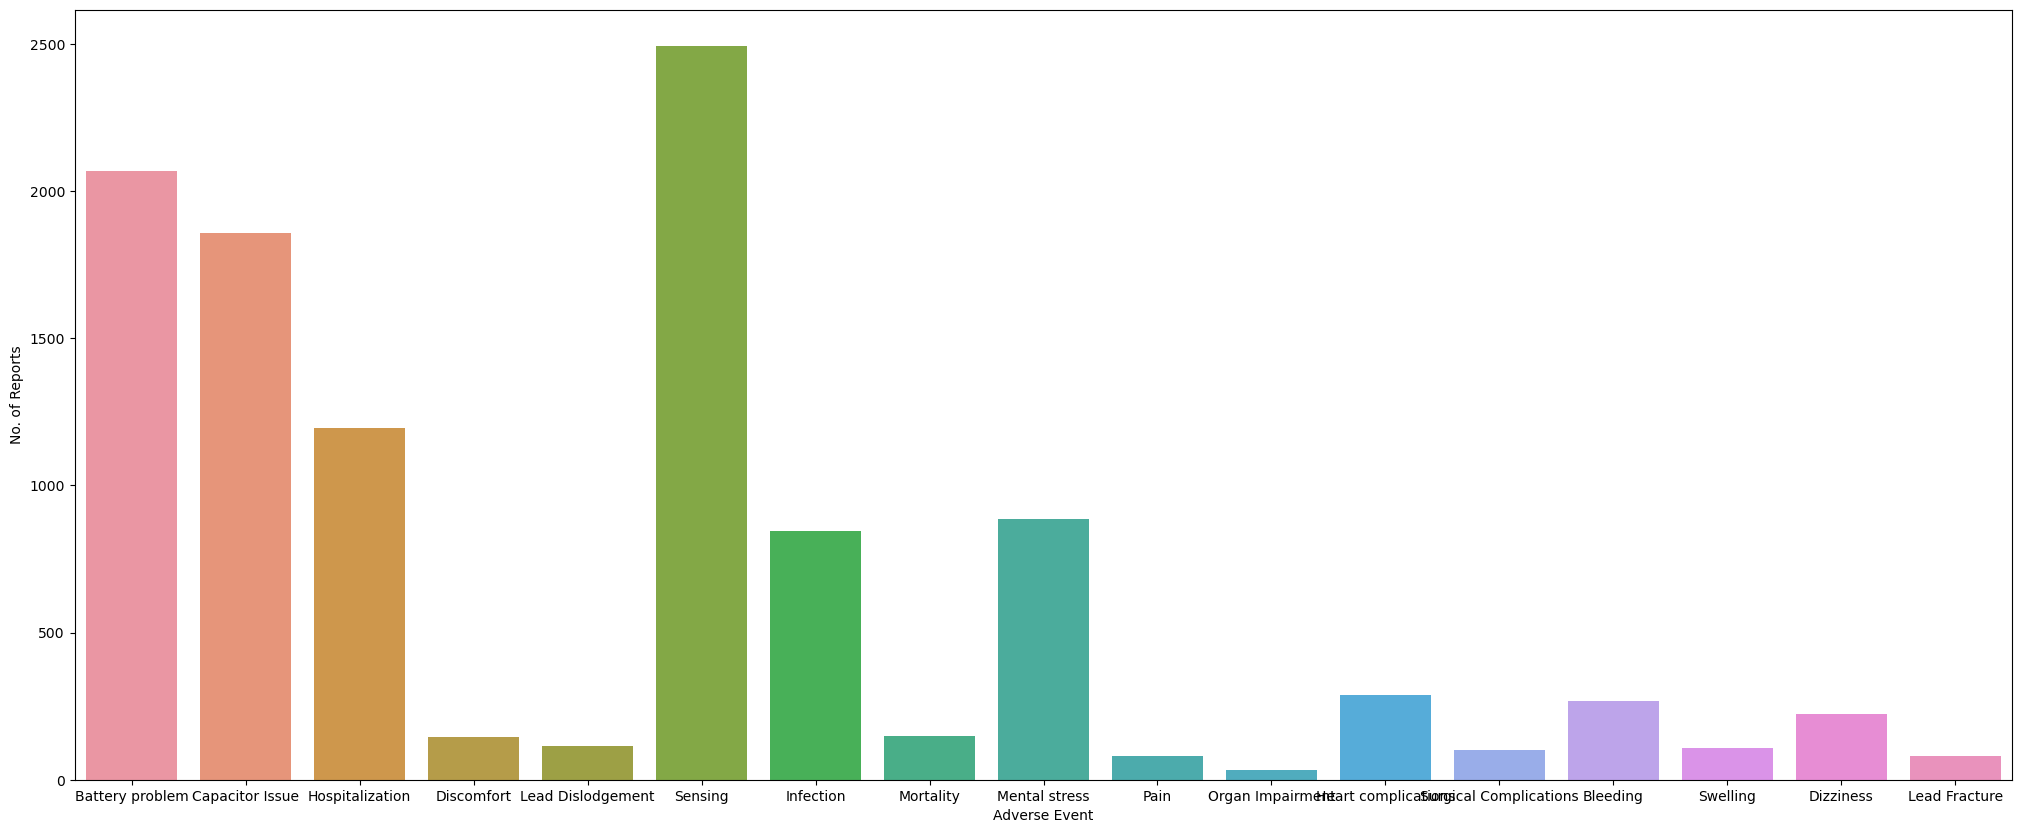

In [109]:
plt.figure(figsize=(25,10))
sns.barplot(data=summary_df,x=x,y=y)

In [92]:
count = 0
for i in keywords.values():
    count += i
print("Total number of words in the report: ",count)

Total number of words in the report:  274640


In [93]:
data1.columns

Index(['MDR_REPORT_KEY', 'DATE_RECEIVED', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_POSTAL_CODE',
       'DEVICE_OPERATOR', 'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER',
       'LOT_NUMBER', 'DEVICE_AVAILABILITY', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_EVALUATED_BY_MANUFACTUR', 'COMBINATION_PRODUCT_FLAG', 'UDI-DI',
       'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'PATIENT_SEQUENCE_NUMBER', 'FOI_TEXT',
       'tokens', 'updated_text', 'ner_results'],
      dtype='object')

In [94]:
data1[['DATE_RECEIVED']]

,DATE_RECEIVED
4,2019-01-01
9,2019-01-01
14,2019-01-01
19,2019-01-02
33,2019-01-02
...,...
14955,2023-12-27
14958,2023-12-27
14964,2023-12-28
14969,2023-12-29


In [95]:
years = data1['DATE_RECEIVED'].unique()

In [96]:
data1['QUARTER_DATE_RECEIVED']=pd.to_datetime(data1['DATE_RECEIVED']).dt.to_period('Q')
quarters = data1['QUARTER_DATE_RECEIVED'].unique()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10728\2535525813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['QUARTER_DATE_RECEIVED']=pd.to_datetime(data1['DATE_RECEIVED']).dt.to_period('Q')


In [97]:
adverse_events_df = pd.DataFrame(index=quarters, columns=adverse_events_keywords.keys()).fillna(0)

In [98]:
for index, row in data1.iterrows():
    quarter = row['QUARTER_DATE_RECEIVED']
    for event in row['updated_text'].keys():
        adverse_events_df.loc[quarter, event] += 1

In [99]:
event_names = list(adverse_events_keywords.keys())
num_events = len(event_names)
batch_size=5

In [100]:
import seaborn as sns

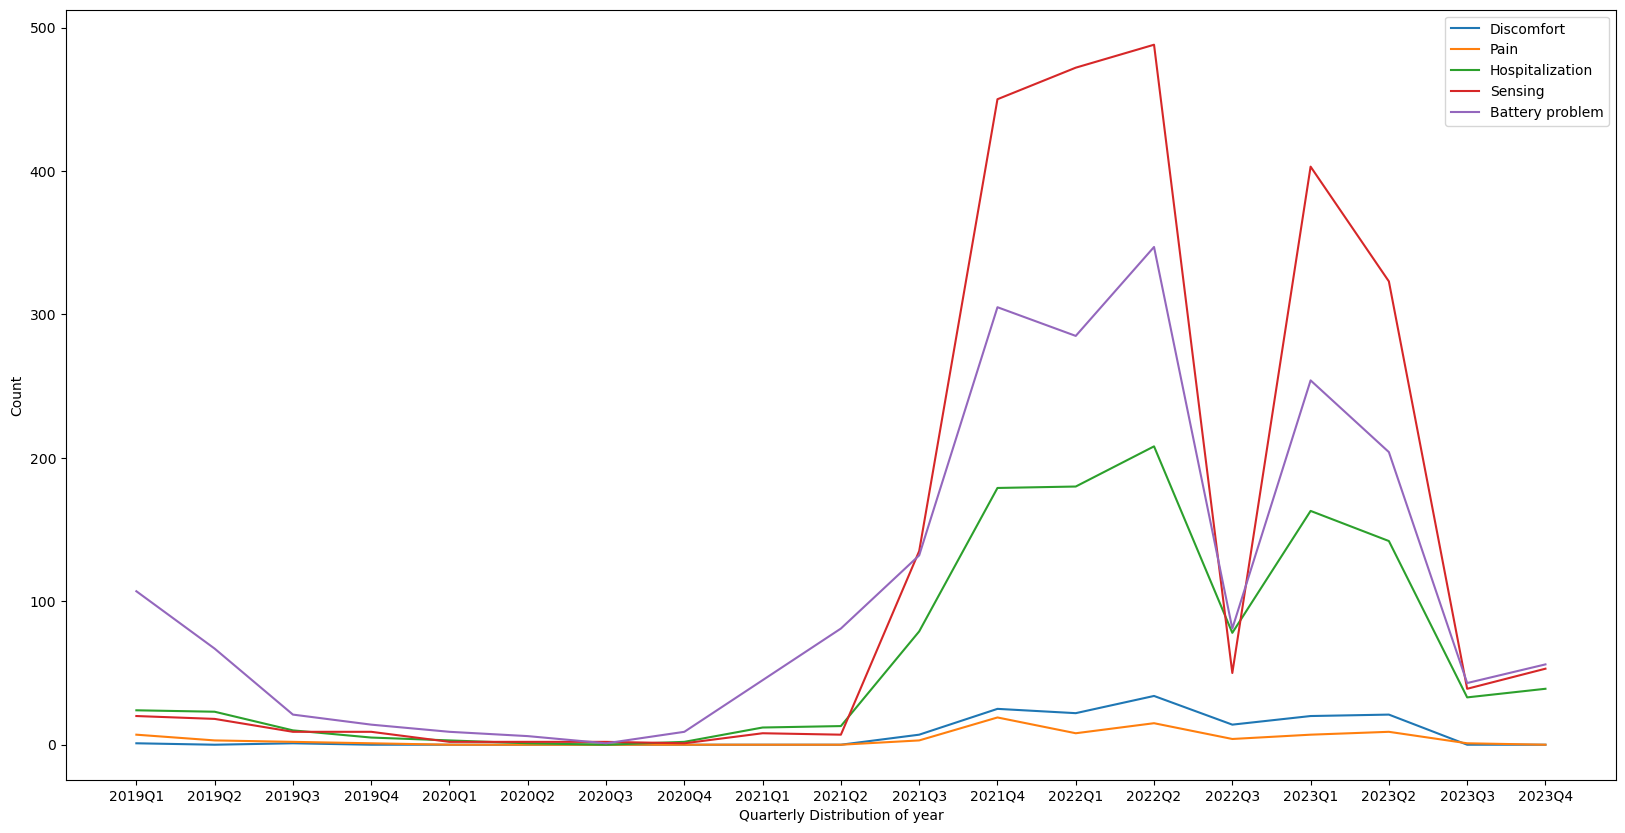

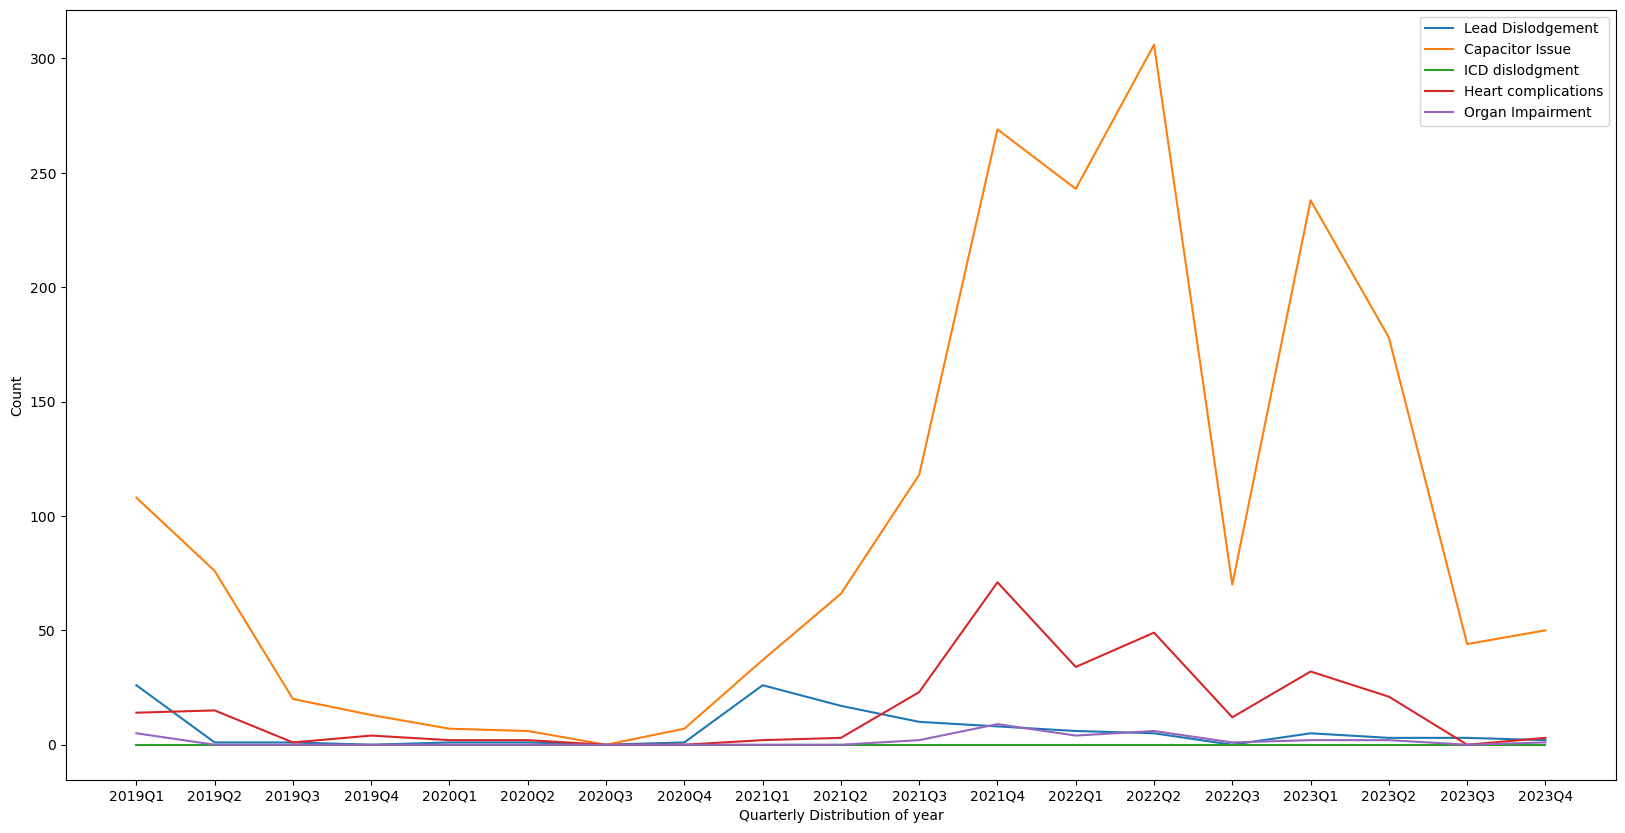

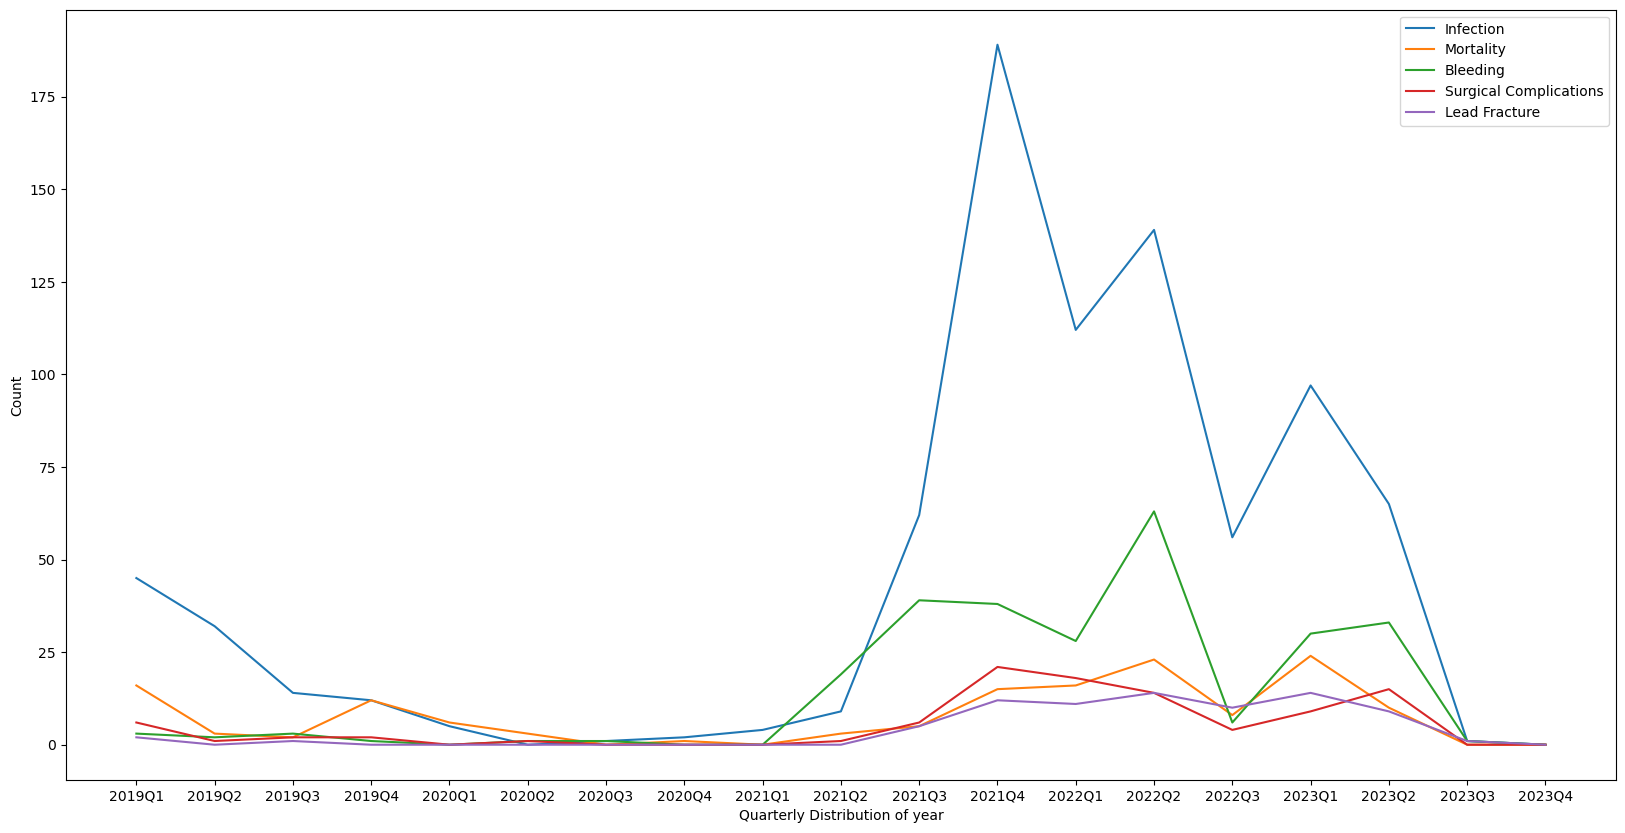

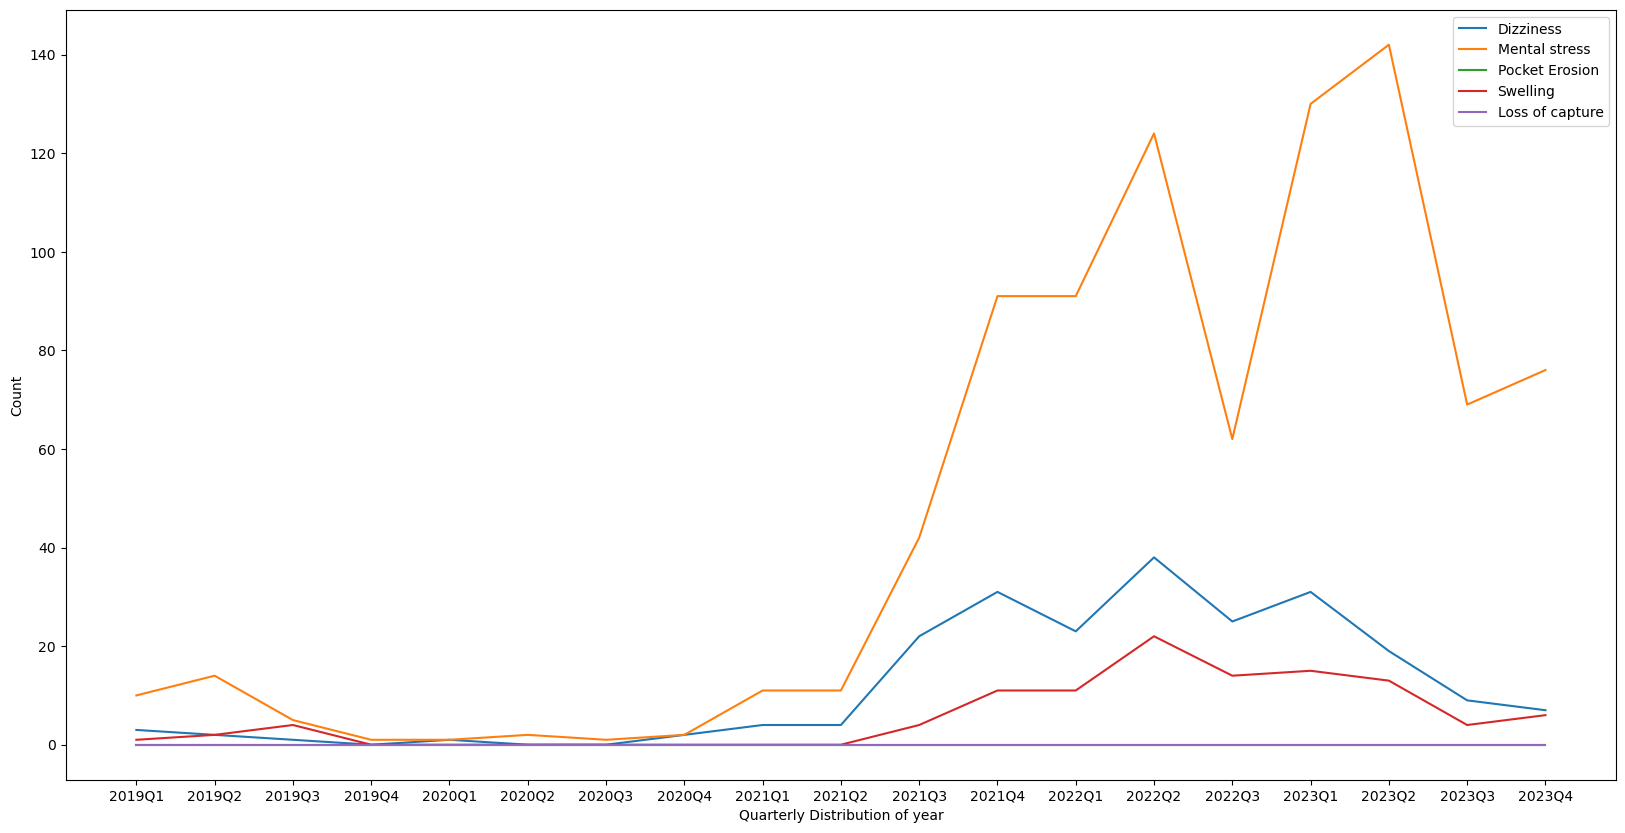

In [101]:
for i in range(0, num_events, batch_size):
    plt.figure(figsize=(20, 10))
    plt.ylabel('Count')
    plt.xlabel('Quarterly Distribution of year')
    for event in event_names[i:i+batch_size]:
        sns.lineplot(data=adverse_events_df, x=adverse_events_df.index.astype(str), y=event, label=event)